<a href="https://colab.research.google.com/github/rafif22-sys/2025_VisiKomputer_TI-2A/blob/main/PenugasanJobsheet2_RafifAli_VisiKomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


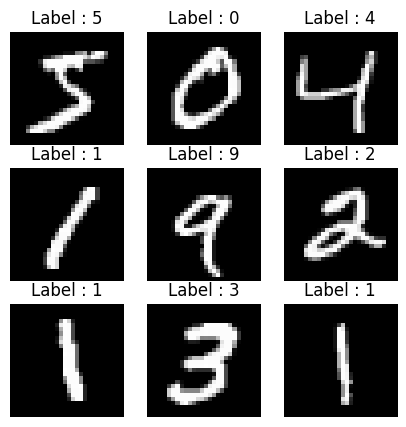

In [1]:
#PRAKTIKUM 1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan Contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8958 - loss: 0.3568 - val_accuracy: 0.9835 - val_loss: 0.0646
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9802 - loss: 0.0629 - val_accuracy: 0.9870 - val_loss: 0.0510
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9868 - val_loss: 0.0513
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9840 - val_loss: 0.0587
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.9897 - val_loss: 0.0444


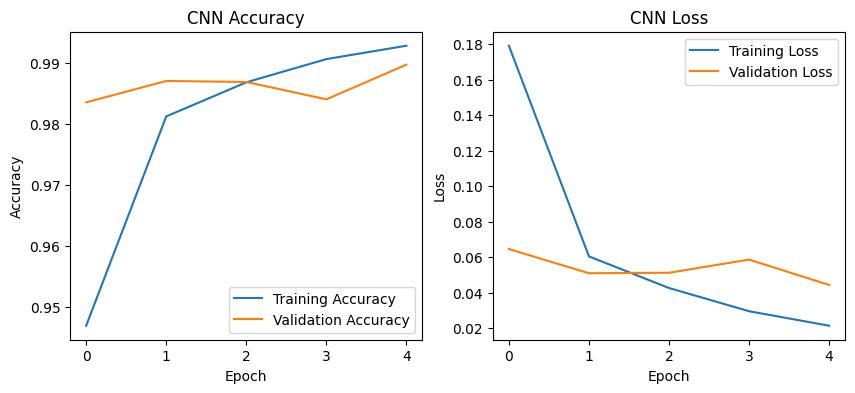

In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [13]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atashitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)
    arr = arr[..., None]
    return canvas, arr


Saving 5baru.jpg to 5baru (1).jpg


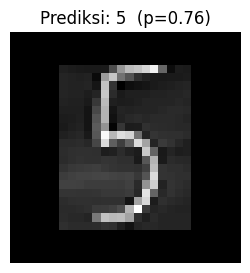

Rekap Prediksi (CNN):
- 5baru (1).jpg -> 5 (p=0.758)


In [14]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)            # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]   # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
